# Predicting whether a passenger survived the sinking Titanic or not


## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable. The code below will allow you to be within the top 8% of the competition


## Data
The dataset used can be obtained from the Kaggle website. 

https://www.kaggle.com/c/titanic/overview

<img src="data.png">

## Metric

Your score is the percentage of passengers you correctly predict. This is known as accuracy.

In [1]:
# Import all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

# Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score #According to the evaluation on Kaggle, we only care about accuracy_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

from scipy import stats

In [2]:
#Import train dataset
df_train= pd.read_csv("train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Let's get  some information about the data

In [3]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

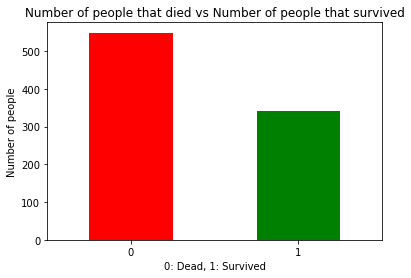

In [7]:
#Visualize the ratio of people that survived to those that did not
df_train["Survived"].value_counts().plot(kind="bar", color=["Red", "Green"])
plt.xlabel("0: Dead, 1: Survived")
plt.ylabel("Number of people")
plt.title("Number of people that died vs Number of people that survived")
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

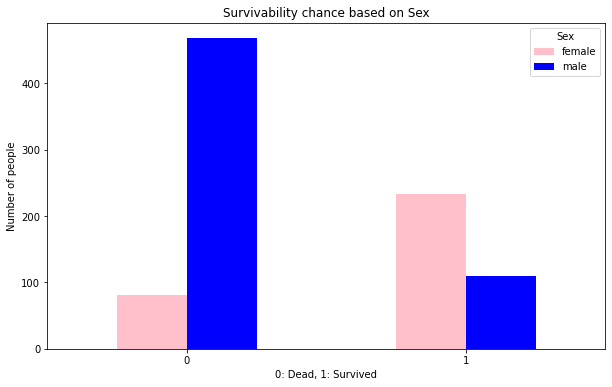

In [8]:
pd.crosstab(df_train.Survived, df_train.Sex).plot(kind="bar", figsize=(10,6), color=["Pink", "Blue"])
plt.title("Survivability chance based on Sex")
plt.ylabel("Number of people")
plt.xlabel("0: Dead, 1: Survived")
plt.xticks(rotation=0)

# Ticket Class vs Survivability Chance

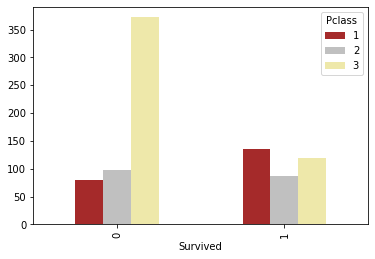

In [9]:
pd.crosstab(df_train.Survived, df_train.Pclass).plot(kind="bar", color=["brown", "silver", "palegoldenrod"])

## Information gathered
A lot more females survived than males. The lower your ticket class, the lower chance of surviving. Most of the people on the ship were from ages 17-30 yrs
Columns that have missing data are: Age, Cabin and Embarked have missing values. 

C:\Users\adith\Anaconda3\envs\Project1\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


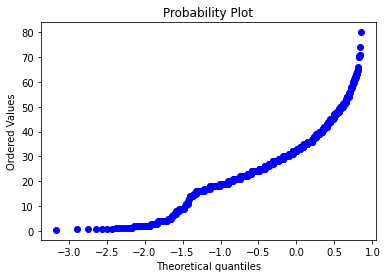

In [10]:
stats.probplot(df_train.Age, plot=plt) #Does not follow a Gaussian Distribution. Therefore lets get rid of the outliers and take a smaller sample
plt.show()

In [11]:
df_train.Age.mean() 

29.69911764705882

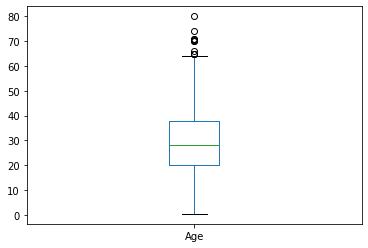

In [12]:
df_train.Age.plot.box()

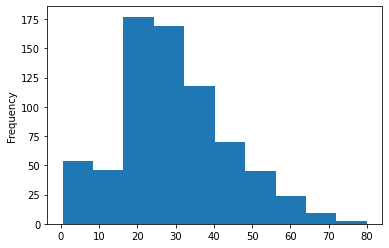

In [13]:
#Histogram of Age
df_train.Age.plot.hist()

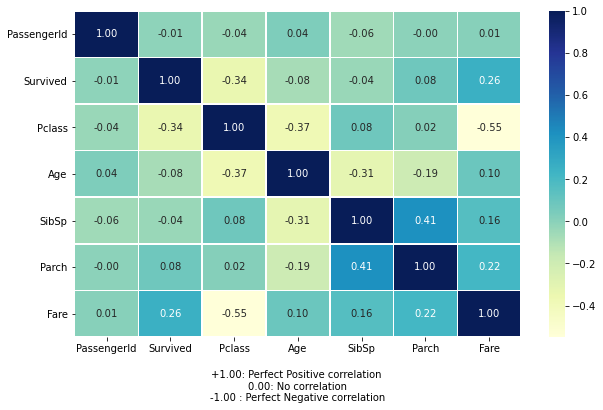

In [14]:
df_corr=df_train.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.heatmap(df_corr, annot=True, linewidth=0.5, fmt="0.2f", cmap="YlGnBu");
plt.xlabel("""
+1.00: Perfect Positive correlation 
0.00: No correlation
-1.00 : Perfect Negative correlation""");

From the correlation matrix you can tell that Pclass and Fare had a strong correlation with Survived variable. 
I did a correlation and checked if the Cabin number had an impact on Survivability. It did not. Therefore I am going to drop that column from the features.

In [15]:
# Fill in the missing columns
mean = df_train["Age"].mean()
std = df_train["Age"].std()
# find random numbers between the mean, std and is_null
for x in df_train.Age.isna():
    random_age = np.random.randint(mean - std, mean + std)
    # fill NaN values in Age column with random values generated
    df_train["Age"].fillna(random_age, inplace=True)
    
# Filling missing Embarked values with most common value
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Modelling

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
labelencoder=LabelEncoder()
embarked_category=labelencoder.fit_transform(df_train.Embarked)
#Embarked values and their categories: (C:0), (S:2), (Q:1)
sex_category=labelencoder.fit_transform(df_train.Sex)
#Male category: 1 , Female category: 0

In [18]:
df_train["embarked_category"]=embarked_category

In [19]:
df_train["sex_category"]=sex_category

In [20]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           891 non-null    object 
 12  embarked_category  891 non-null    int32  
 13  sex_category       891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(5)
memory usage: 90.6+ KB


In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_category,sex_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,1


In [22]:
X=df_train.drop(labels=["Survived", "Cabin", "Embarked","Name", "Ticket","Sex"], axis=1)
y=df_train["Survived"]

X.shape, y.shape

((891, 8), (891,))

In [23]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [24]:
# We are going to use 3 main models and see which performs the best and narrow it down to one
models={"Logistic Regression": LogisticRegression(),
       "K-Neighbors": KNeighborsClassifier(),
       "RandomForestClassifier": RandomForestClassifier(),
       "GBoostingClassifier": GradientBoostingClassifier(),
       "LinearSVC":LinearSVC()}

# Create a function to fit and score each model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given ML models
    
    models: dictionary of different Scikit-Learn ML models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training data (target values)
    y_test: test data(predictions)
    """
    #Set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_train_scores={}
    model_test_scores={}
    #Loop through the models and fit the model to data
    for name, model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and save its score
        model_train_scores[name]=model.score(X_train,y_train)
        model_test_scores[name]=model.score(X_test,y_test)
    return model_test_scores, model_train_scores

In [25]:
np.random.seed(42)
model_test_scores, model_train_scores=fit_and_score(models,X_train,X_test, y_train, y_test)
print(f"Train scores: {model_train_scores}")
print(f"Test scores : {model_test_scores}")

C:\Users\adith\Anaconda3\envs\Project1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train scores: {'Logistic Regression': 0.7949438202247191, 'K-Neighbors': 0.7457865168539326, 'RandomForestClassifier': 1.0, 'GBoostingClassifier': 0.898876404494382, 'LinearSVC': 0.6587078651685393}
Test scores : {'Logistic Regression': 0.770949720670391, 'K-Neighbors': 0.6703910614525139, 'RandomForestClassifier': 0.8491620111731844, 'GBoostingClassifier': 0.8156424581005587, 'LinearSVC': 0.6703910614525139}


C:\Users\adith\Anaconda3\envs\Project1\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([0]), <a list of 1 Text major ticklabel objects>)

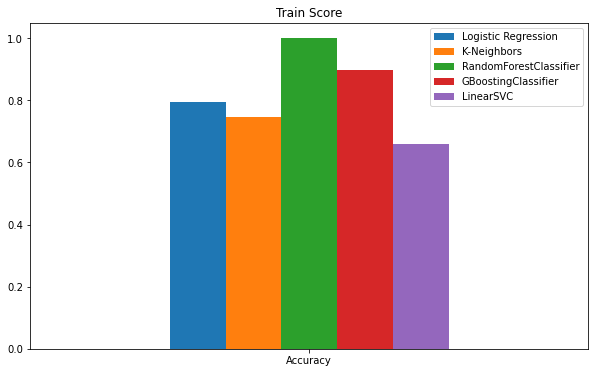

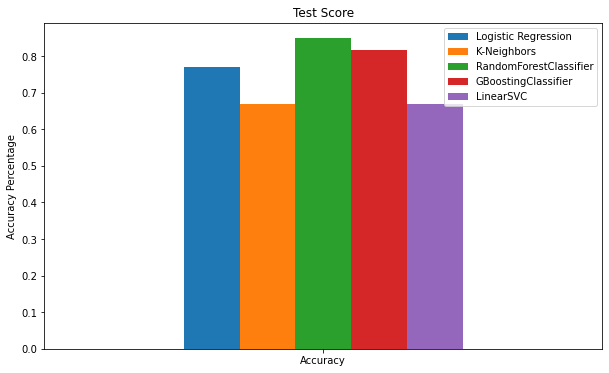

In [26]:
#Visualize the train and test set scores for different models
model_train_compare=pd.DataFrame(model_train_scores, index=["Accuracy"])
model_test_compare=pd.DataFrame(model_test_scores, index=["Accuracy"])

model_train_compare.plot.bar(figsize=(10,6))
plt.xticks(rotation=0)
plt.title("Train Score")
model_test_compare.plot.bar(figsize=(10,6)) 
plt.title("Test Score")
plt.ylabel("Accuracy Percentage")
plt.xticks(rotation=0)

# Hyper parameter tuning for other ML models

Max KNN score on test data: 67.60%


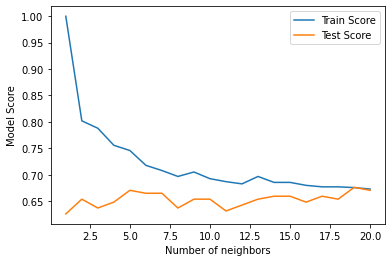

In [27]:
#Lets tune KNN first
np.random.seed(42)
train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update training score list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update test score list
    test_scores.append(knn.score(X_test,y_test))

    
# Visualize training and test scores
plt.plot(neighbors,train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Max KNN score on test data: {max(test_scores)*100:0.2f}%")

### KNN is still a poor model. Therefore lets try hyperparameter tuning on GradientBoostingClassifier

In [28]:
#Hyperparameter tuning for GradientBoostingClassifier
gbc_grid = {
    "n_estimators":[5,50,250,300,350,400,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1, 0.5,1, 2, 10,100]
}
gbc_grid_search=GridSearchCV(GradientBoostingClassifier(), param_grid=gbc_grid, n_jobs=-1, cv=5,verbose=True)
gbc_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1225 out of 1225 | elapsed:  6.6min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 2, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 300, 350, 400, 500]},
             verbose=True)

In [29]:
gbc_grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 350}

In [30]:
#GradientBoostingClassifier with best hyperparameters
np.random.seed(42)
best_model=GradientBoostingClassifier(learning_rate= 0.01,n_estimators= 400, max_depth=3)
best_model.fit(X_train,y_train)
y_preds=best_model.predict(X_test)
accuracy_score(y_test, y_preds) 

0.8212290502793296

## Confusion matrix  and classification report for GradientBoostingClassifier

[[94 11]
 [21 53]]


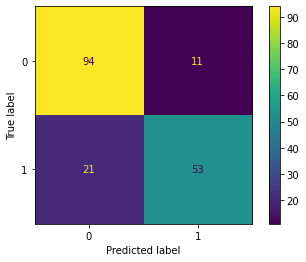

In [31]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

#Visualize confusion matrix
plot_confusion_matrix(best_model,X_test,y_test)

In [32]:
#Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



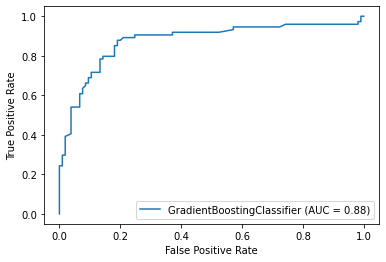

In [33]:
#Plotting ROC curve
plot_roc_curve(best_model,X_test, y_test)

## Crossvalidated score for GradientBoostingClassifier

In [34]:
#Cross-validated accuracy
np.random.seed(42)
cv_accuracy=cross_val_score(best_model,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_accuracy)
cv_acc

0.7846902266022222

In [35]:
#Cross-validated precision
cv_prec=np.mean(cross_val_score(best_model,X,y,cv=5,scoring="precision"))
cv_prec

0.8772559800442222

In [36]:
#Cross-validated recall
cv_recall=np.mean(cross_val_score(best_model,X,y,cv=5,scoring="recall"))
cv_recall

0.539002557544757

In [37]:
#Cross-validated f1
cv_f1=np.mean(cross_val_score(best_model,X,y,cv=5,scoring="f1"))
cv_f1

0.6071720455425125

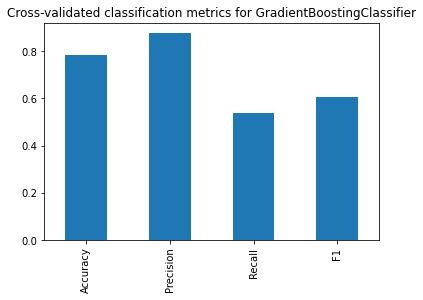

In [38]:
#Lets visualize the metrics
cv_metrics_GBC=pd.DataFrame({"Accuracy": cv_acc,
                        "Precision": cv_prec,
                        "Recall": cv_recall,
                        "F1": cv_f1},
                       index=[0])
cv_metrics_GBC.T.plot.bar(title="Cross-validated classification metrics for GradientBoostingClassifier",
                     legend=False)

## RandomForestClassifier hyperparameter tuning

In [39]:
#Lets use RandomizedSearchCV first to narrow down the hyperparameter list. Saves processing time
np.random.seed(42)
rf_param={"n_estimators": np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "max_features":['auto', "log"],
        "min_samples_split": np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

random_search_model=RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_param, n_iter=20, n_jobs=-1, cv=5,verbose=True)
random_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.7s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'log'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
random_search_model.best_params_

{'n_estimators': 560,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 10}

In [41]:
#Lets optimize the parameters for RandomForestClassifier using GridSearch
np.random.seed(42)
rf_grid={"n_estimators": np.arange(10,400,50),
        "max_depth":[5,10],
        "max_features":['auto', "log"],
        "min_samples_split": [2,4,10,12],
        "min_samples_leaf": [1,3,5,7]}

grid_search_model=GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, n_jobs=-1, cv=5,verbose=True)
grid_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1262 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1812 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2462 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  5.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'log'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 10, 12],
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360])},
             verbose=True)

In [42]:
grid_search_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 210}

In [43]:
grid_search_model.score(X_test,y_test)

0.8100558659217877

In [86]:
#Lets create a RandomForestClassifier with the best hyperparameters
np.random.seed(42)
best_model=RandomForestClassifier(n_estimators=210, min_samples_leaf=1,min_samples_split=2)
best_model.fit(X_train,y_train)
y_preds=best_model.predict(X_test)
accuracy_score(y_test, y_preds) 

0.8379888268156425

## Confusion matrix and Classification Report

[[94 11]
 [18 56]]


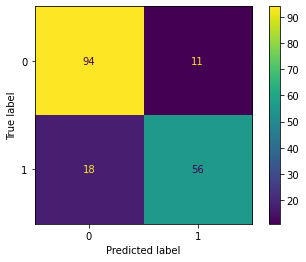

In [45]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

#Visualize confusion matrix
plot_confusion_matrix(best_model,X_test,y_test)

In [46]:
#Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



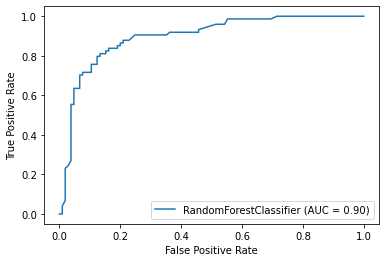

In [47]:
#Plotting ROC Curve for RandomForestClassifier
plot_roc_curve(best_model,X_test,y_test)

## Cross validated Scores for RandomForestClassifier

In [48]:
#Cross-validated accuracy
np.random.seed(42)
cv_accuracy=cross_val_score(best_model,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_accuracy)
cv_acc

0.8037223024292259

In [49]:
#Cross-validated precision
cv_prec=np.mean(cross_val_score(best_model,X,y,cv=5,scoring="precision"))
cv_prec

0.8095826395826397

In [50]:
#Cross-validated recall
cv_recall=np.mean(cross_val_score(best_model,X,y,cv=5,scoring="recall"))
cv_recall

0.6380647911338448

In [51]:
#Cross-validated f1
cv_f1=np.mean(cross_val_score(best_model,X,y,cv=5,scoring="f1"))
cv_f1

0.7038567219388641

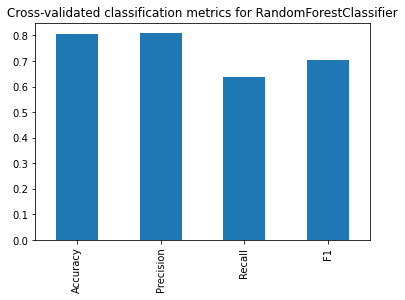

In [52]:
#Lets visualize the metrics
cv_metrics_RFC=pd.DataFrame({"Accuracy": cv_acc,
                        "Precision": cv_prec,
                        "Recall": cv_recall,
                        "F1": cv_f1},
                       index=[0])
cv_metrics_RFC.T.plot.bar(title="Cross-validated classification metrics for RandomForestClassifier",
                     legend=False)

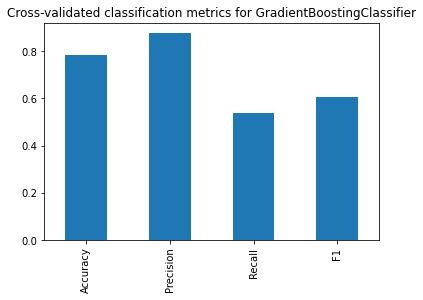

In [53]:
#Lets see the Crossvalidated score for GBC and compare it to RandomForestClassifier
cv_metrics_GBC.T.plot.bar(title="Cross-validated classification metrics for GradientBoostingClassifier",
                     legend=False)

### Lets stick with the GradientBoostingClassifier since there is no real significant difference compared to the RandomForestClassifier

In [100]:
#GradientBoostingClassifier with best hyperparameters
np.random.seed(42)
best_model=GradientBoostingClassifier(learning_rate= 0.01,n_estimators= 400, max_depth=3)
best_model.fit(X_train,y_train)
y_preds=best_model.predict(X_test)
accuracy_score(y_test, y_preds) 

0.8212290502793296

## Import test set on Kaggle and lets check our accuracy score

In [101]:
kaggle_test_set=pd.read_csv("test.csv")
kaggle_test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
#Transform the dataset like we did with the training and validation set before using ML model
labelencoder=LabelEncoder()
embarked_category=labelencoder.fit_transform(kaggle_test_set.Embarked)
#Embarked values and their categories: (C:0), (S:2), (Q:1)
sex_category=labelencoder.fit_transform(kaggle_test_set.Sex)
#Male category: 1 , Female category: 0

In [103]:
kaggle_test_set["embarked_category"]=embarked_category
kaggle_test_set["sex_category"]=sex_category

In [104]:
kaggle_test_set.isna().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                   86
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin                327
Embarked               0
embarked_category      0
sex_category           0
dtype: int64

In [105]:
# Fill in the missing columns
mean = kaggle_test_set["Age"].mean()
std = kaggle_test_set["Age"].std()
# find random numbers between the mean, std and is_null
for x in kaggle_test_set.Age.isna():
    random_age = np.random.randint(mean - std, mean + std)
    # fill NaN values in Age column with random values generated
    kaggle_test_set["Age"].fillna(random_age, inplace=True)
    

In [106]:
kaggle_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        418 non-null    int64  
 1   Pclass             418 non-null    int64  
 2   Name               418 non-null    object 
 3   Sex                418 non-null    object 
 4   Age                418 non-null    float64
 5   SibSp              418 non-null    int64  
 6   Parch              418 non-null    int64  
 7   Ticket             418 non-null    object 
 8   Fare               417 non-null    float64
 9   Cabin              91 non-null     object 
 10  Embarked           418 non-null    object 
 11  embarked_category  418 non-null    int32  
 12  sex_category       418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 39.3+ KB


In [107]:
print(kaggle_test_set[kaggle_test_set.Fare.isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  embarked_category  sex_category  
152   NaN   NaN        S                  2             1  


In [108]:
kaggle_test_set[(kaggle_test_set.embarked_category==2) & (kaggle_test_set.sex_category==1)]["Fare"].mode()

0    13.0
dtype: float64

In [109]:
#Lets fill the missing value for the Fare row.
kaggle_test_set["Fare"].fillna(13.0,inplace=True)
X=kaggle_test_set.drop(labels=["Cabin", "Embarked","Name", "Ticket","Sex"], axis=1)

X.shape

(418, 8)

In [110]:
y_kaggle_preds=best_model.predict(X)
y_kaggle_preds

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Feature Importance

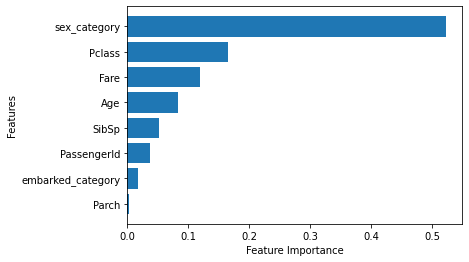

In [111]:
#Helper function to plot feature importance
def plot_features(columns, importances, n=20):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))

    #Plot the dataframe
    fig, ax=plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

    
    
plot_features(X_train.columns, best_model.feature_importances_)

# Export predictions to a csv file for Kaggle submission

In [112]:
kaggle_submission=pd.DataFrame(X.PassengerId)
kaggle_submission["Survived"]=y_kaggle_preds
kaggle_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [113]:
kaggle_submission.to_csv("kaggle_submission.csv", index=False)